In [1]:
TASKS = [
    'FSR_Trainable_2023-08-10_14-56-54',
    'FSR_Trainable_2023-08-10_16-28-50',
    'FSR_Trainable_2023-08-10_18-18-32',
    'FSR_Trainable_2023-08-11_03-36-28',
    'FSR_Trainable_2023-07-19_00-13-04',
    'FSR_Trainable_2023-07-19_01-25-28',
    'FSR_Trainable_2023-07-19_02-32-25',
    'FSR_Trainable_2023-07-19_03-37-48',
    'FSR_Trainable_2023-07-19_04-38-35',
    'FSR_Trainable_2023-08-10_22-35-32',
    'FSR_Trainable_2023-08-10_23-25-39',
    'FSR_Trainable_2023-08-11_00-39-35',
    'FSR_Trainable_2023-07-19_09-38-35',
    'FSR_Trainable_2023-07-19_10-04-48',
    'FSR_Trainable_2023-07-19_11-36-24',
    'FSR_Trainable_2023-07-19_12-32-34',
    'FSR_Trainable_2023-07-19_13-03-12',
    'FSR_Trainable_2023-08-07_15-54-13',
]

In [2]:
force = { 
    'sklearn.preprocessing.StandardScaler':[],
    'sklearn.preprocessing.MinMaxScaler':[],
    'sklearn.preprocessing.RobustScaler':[],
}
coord = { 
    'sklearn.preprocessing.StandardScaler':[],
    'sklearn.preprocessing.MinMaxScaler':[],
    'sklearn.preprocessing.RobustScaler':[],
}
import ray.tune
from fsr_trainable import FSR_Trainable

for task in TASKS:
    result_grid = ray.tune.Tuner.restore('/home/seokj/ray_results/' + task, FSR_Trainable).get_results()
    for result in result_grid:
        config = result.metrics.get('config')
        if not config:
            continue
        scaler = config['scaler']
        if 'FSR_for_force' in config['index_X']:
            metric = result.metrics.get('rmse_force')
            if metric:
                metric = (metric ** 2 / 6) ** 0.5
            else:
                metric = result.metrics['rmse']
            force[scaler].append(metric)
        if 'FSR_for_coord' in config['index_X']:
            metric = result.metrics.get('rmse_coord')
            if metric:
                metric = (metric ** 2 / 6) ** 0.5
            else:
                metric = result.metrics['rmse']
            coord[scaler].append(metric)
force, coord

Failed to read the results for 1 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_14-56-54/FSR_Trainable_35a8f235_42_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_15-08-27
Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
Failed to read the results for 10 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-11_03-36-28/FSR_Trainable_1d98c04f_29_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,index_X=FSR_for_force,index_y=_2023-08-11_03-44-07
- /home/seokj/ray_results/FSR_Tr

({'sklearn.preprocessing.StandardScaler': [200.3957687597452,
   406.7138478818586,
   495.06006543786583,
   201.55743934888017,
   362.9623904350134,
   326.83744956842287,
   387.22220710996885,
   499.42923599540717,
   279.6906385954672,
   421.876440114931,
   481.3376893732039,
   414.16495420288027,
   354.6664455998026,
   337.3099484832489,
   455.1962297635634,
   297.0776763212132,
   451.25850499471983,
   343.25563387235695,
   388.1649025026023,
   398.6946168780596,
   408.2192081161911,
   451.56819607433295,
   253.135883227644,
   394.5931613586129,
   449.5612280815453,
   445.0986616354692,
   425.5198480111309,
   356.8604698367153,
   252.72897110495245,
   409.25514401962937,
   450.80124183894804,
   350.4300723543235,
   362.5884925564064,
   4151.303325288042,
   451.33859150090547,
   203.5022840262326,
   200.2887479595509,
   216.90493932735703,
   661.7923491164554,
   348.62335024797454,
   216.51488465756685,
   212.00125042487733,
   528.7012623143809,

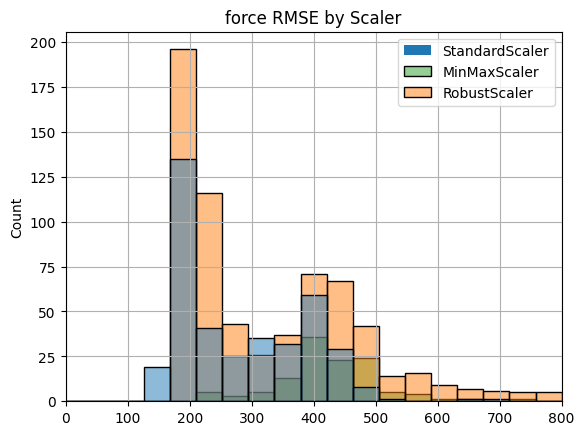

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(force, bins=np.linspace(0, 800, 20))
plt.xlim(0, 800)
plt.legend(['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
plt.title('force RMSE by Scaler')
plt.grid()
plt.savefig('./plot6.png', transparent=True)

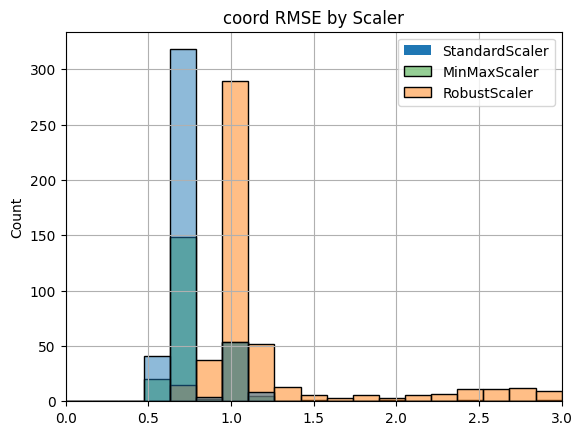

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(coord, bins=np.linspace(0, 3, 20))
plt.xlim(0, 3)
plt.legend(['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
plt.title('coord RMSE by Scaler')
plt.grid()
plt.savefig('./plot7.png', transparent=True)

In [5]:
force = { 
    'mean':[],
    'median':[],
}
coord = { 
    'mean':[],
    'median':[],
}
import ray.tune
from fsr_trainable import FSR_Trainable

try:
    for task in TASKS:
        result_grid = ray.tune.Tuner.restore('/home/seokj/ray_results/' + task, FSR_Trainable).get_results()
        for result in result_grid:
            config = result.metrics.get('config')
            if not config:
                continue
            if 'FSR_for_coord' in config['index_X']:
                imputer = config['imputer_args']['strategy']
                metric = result.metrics.get('rmse_coord')
                if metric:
                    metric = (metric ** 2 / 6) ** 0.5
                else:
                    metric = result.metrics['rmse']
                coord[imputer].append(metric)
except:
    print(result.metrics)
force, coord

Failed to read the results for 1 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_14-56-54/FSR_Trainable_35a8f235_42_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_15-08-27
Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
Failed to read the results for 10 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-11_03-36-28/FSR_Trainable_1d98c04f_29_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,index_X=FSR_for_force,index_y=_2023-08-11_03-44-07
- /home/seokj/ray_results/FSR_Tr

({'mean': [], 'median': []},
 {'mean': [0.9605829394495999,
   0.9616635950747691,
   1.0716564133992708,
   0.9304063143599431,
   0.9713333233220088,
   2.498069087979915,
   1.0056781168221787,
   1.1384102377148009,
   1.1043197970997158,
   0.9987488782574565,
   1.8483535848500234,
   1.3790151284393173,
   3.855378510196054,
   0.9792494124563584,
   0.9589727955806828,
   1.0983258095625554,
   0.9674107996588313,
   1.0672558806620964,
   0.9709269521387756,
   1.83373455143604,
   2.602346048018509,
   3.53686676741495,
   0.9651469795792164,
   0.9613962766019872,
   0.9537193600767232,
   0.9634218306871125,
   0.968864703935221,
   0.9519941457063937,
   1.0485356095423806,
   0.96284834746041,
   1.054722605170875,
   0.9502274625858949,
   0.9546707813787862,
   4.519243318073834,
   1.0428336475755948,
   1.1138165561786297,
   0.973358051188463,
   1.2303550362746951,
   4.059061042311361,
   1.0870561455863024,
   0.9771067116171501,
   4.572820779124375,
   1.4406301

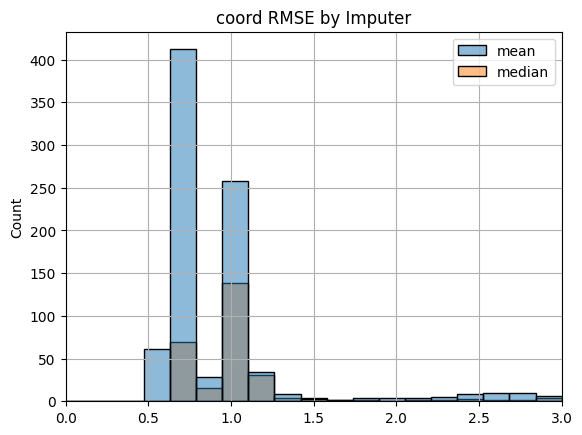

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(coord, bins=np.linspace(0, 3, 20))
plt.xlim(0, 3)
plt.title('coord RMSE by Imputer')
plt.grid()
plt.savefig('./plot8.png', transparent=True)

In [7]:
force = { 
    'fsr_model.ANN':{
        'hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'num_layer':{i: [] for i in range(1, 9)},
    },
    'fsr_model.CNN_LSTM':{
        'cnn_hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'lstm_hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'cnn_num_layer':{i: [] for i in range(1, 9)},
        'lstm_num_layer':{i: [] for i in range(1, 9)},
    },
    'fsr_model.LSTM':{
        'hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'num_layer':{i: [] for i in range(1, 9)},
    },
}
coord = { 
    'fsr_model.ANN':{
        'hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'num_layer':{i: [] for i in range(1, 9)},
    },
    'fsr_model.CNN_LSTM':{
        'cnn_hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'lstm_hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'cnn_num_layer':{i: [] for i in range(1, 9)},
        'lstm_num_layer':{i: [] for i in range(1, 9)},
    },
    'fsr_model.LSTM':{
        'hidden_size':{i: [] for i in [8, 16, 32, 64, 128]},
        'num_layer':{i: [] for i in range(1, 9)},
    },
}
import ray.tune
from fsr_trainable import FSR_Trainable
try:
    for task in TASKS:
        result_grid = ray.tune.Tuner.restore('/home/seokj/ray_results/' + task, FSR_Trainable).get_results()
        for result in result_grid:
            config = result.metrics.get('config')
            if not config:
                continue
            model = config['model']
            if 'FSR_for_force' in config['index_X']:
                metric = result.metrics.get('rmse_force')
                if metric:
                    metric = (metric ** 2 / 6) ** 0.5
                else:
                    metric = result.metrics['rmse']
                for key, value in config['model_args'].items():
                    force[model][key][value].append(metric)
            if 'FSR_for_coord' in config['index_X']:
                metric = result.metrics.get('rmse_coord')
                if metric:
                    metric = (metric ** 2 / 6) ** 0.5
                else:
                    metric = result.metrics['rmse']
                for key, value in config['model_args'].items():
                    coord[model][key][value].append(metric)
except Exception as e:
    print(e)
    print(result.metrics)
force, coord

Failed to read the results for 1 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_14-56-54/FSR_Trainable_35a8f235_42_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_15-08-27
Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
Failed to read the results for 10 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-11_03-36-28/FSR_Trainable_1d98c04f_29_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,index_X=FSR_for_force,index_y=_2023-08-11_03-44-07
- /home/seokj/ray_results/FSR_Tr

({'fsr_model.ANN': {'hidden_size': {8: [541.0363962402663,
     200.37326726817017,
     200.49721253722353,
     214.5651311597204,
     495.06006543786583,
     201.55743934888017,
     611.1322958201821,
     376.4008275159788,
     384.8234683817446,
     722.3747546782231,
     382.3537040163275,
     624.6829899738559,
     560.690945573014,
     903.3433532277957,
     428.3816089768411,
     430.4511777610266,
     287.222973566652,
     556.5293007616294,
     574.4699565970542,
     377.5073075242542,
     279.2778243244235,
     215.99807790958678,
     831.1929433112358,
     233.63953747154906,
     741.7395326138754,
     200.63463329468263,
     348.2862814183904,
     613.0650383939003,
     253.1082367444086,
     229.43212727035666,
     655.8046138713236,
     233.0350569128732,
     1582.949551497229,
     771.0091503950492,
     258.0812719944,
     461.70576856821407,
     382.7538163282617,
     410.38164082436526,
     420.2450409406606,
     594.7718075391539,


In [8]:
force['fsr_model.ANN']['hidden_size'][16]

[452.1369428342538,
 326.83744956842287,
 387.22220710996885,
 279.6906385954672,
 421.876440114931,
 481.3376893732039,
 557.0060114039493,
 280.5758166475365,
 661.7923491164554,
 348.62335024797454,
 463.3732855473943,
 477.88862585460805,
 331.7604889623142,
 404.71390809960695,
 447.8917425304706,
 297.88863403765407,
 555.8848516206227,
 384.06631750117236,
 260.673599356839,
 380.72371006184403,
 678.8968063377905,
 764.2146771968345,
 525.8001388455642,
 414.952425469333,
 713.0426005911397,
 381.34857524061516,
 420.7876018211327,
 431.2904067490089,
 380.481338246512,
 390.4691711820004,
 639.643406415068]

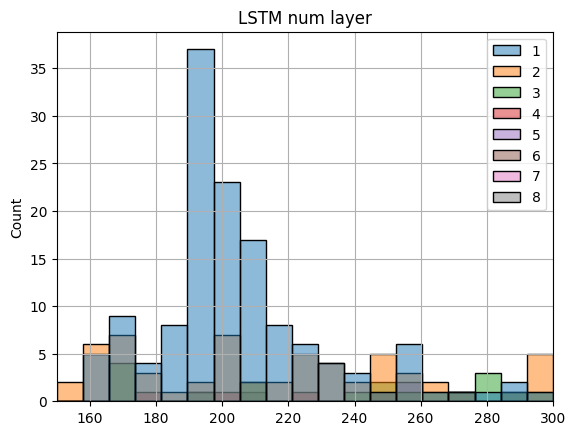

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
subject = [
    ('fsr_model.ANN', 'hidden_size', 'ANN hidden size', 'ann_hidden_size'),
    ('fsr_model.ANN', 'num_layer', 'ANN num layer', 'ann_num_layer'),
    ('fsr_model.CNN_LSTM', 'cnn_hidden_size', 'CNN-LSTM cnn hidden size', 'cnn_lstm_cnn_hidden_size'),
    ('fsr_model.CNN_LSTM', 'lstm_hidden_size', 'CNN-LSTM lstm hidden size', 'cnn_lstm_lstm_hidden_size'),
    ('fsr_model.CNN_LSTM', 'cnn_num_layer', 'CNN-LSTM cnn num layer', 'cnn_lstm_cnn_num_layer'),
    ('fsr_model.CNN_LSTM', 'lstm_num_layer', 'CNN-LSTM lstm num layer', 'cnn_lstm_lstm_num_layer'),
    ('fsr_model.LSTM', 'hidden_size', 'LSTM hidden size', 'lstm_hidden_size'),
    ('fsr_model.LSTM', 'num_layer', 'LSTM num layer', 'lstm_num_layer'),
]
for model, arg, title, filename in subject:
    plt.cla()
    sns.histplot(force[model][arg], bins=np.linspace(150, 300, 20))
    plt.xlim(150, 300)
    plt.title(title)
    plt.grid()
    plt.savefig(f'images/tuning_result_{filename}_force.png', transparent=True)

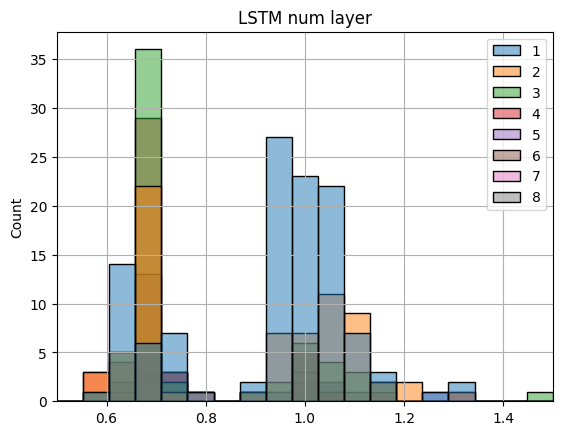

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
subject = [
    ('fsr_model.ANN', 'hidden_size', 'ANN hidden size', 'ann_hidden_size'),
    ('fsr_model.ANN', 'num_layer', 'ANN num layer', 'ann_num_layer'),
    ('fsr_model.CNN_LSTM', 'cnn_hidden_size', 'CNN-LSTM cnn hidden size', 'cnn_lstm_cnn_hidden_size'),
    ('fsr_model.CNN_LSTM', 'lstm_hidden_size', 'CNN-LSTM lstm hidden size', 'cnn_lstm_lstm_hidden_size'),
    ('fsr_model.CNN_LSTM', 'cnn_num_layer', 'CNN-LSTM cnn num layer', 'cnn_lstm_cnn_num_layer'),
    ('fsr_model.CNN_LSTM', 'lstm_num_layer', 'CNN-LSTM lstm num layer', 'cnn_lstm_lstm_num_layer'),
    ('fsr_model.LSTM', 'hidden_size', 'LSTM hidden size', 'lstm_hidden_size'),
    ('fsr_model.LSTM', 'num_layer', 'LSTM num layer', 'lstm_num_layer'),
]
for model, arg, title, filename in subject:
    plt.cla()
    sns.histplot(coord[model][arg], bins=np.linspace(0.5, 1.5, 20))
    plt.xlim(0.5, 1.5)
    plt.title(title)
    plt.grid()
    plt.savefig(f'images/tuning_result_{filename}_coord.png', transparent=True)